# Global Power Plant

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
data=pd.read_csv("global_power_plant.csv")
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
#checking for missing values
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

As there are a lot of columns that have missing values in it and few of them even have all the rows empty so we need to remove them.

In [10]:
data.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [11]:
data.shape

(908, 13)

In [12]:
data.nunique()

country                    1
country_long               1
name                     908
gppd_idnr                908
capacity_mw              365
latitude                 837
longitude                828
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
dtype: int64

In [13]:
data.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [14]:
print(data.shape)


(908, 7)


In [15]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.500,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.000,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.200,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.000,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.000,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI
5,250.000,23.7689,68.6447,Coal,2005.0,Central Electricity Authority,WRI
6,60.000,10.4547,77.0078,Hydro,1970.0,Central Electricity Authority,WRI
7,192.000,32.2258,77.2070,Hydro,2010.0,Central Electricity Authority,WRI
8,290.000,16.3300,75.8863,Hydro,2004.0,Central Electricity Authority,WRI
9,210.000,23.1642,81.6373,Coal,2008.0,Central Electricity Authority,WRI


Even after dropping the data we still had some missing data and that needs to be treated

In [18]:
#before that we need to separate our categorical columns and numerical columns to make the application of mean and mode.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            862 non-null    float64
 2   longitude           862 non-null    float64
 3   primary_fuel        908 non-null    object 
 4   commissioning_year  528 non-null    float64
 5   source              908 non-null    object 
 6   geolocation_source  889 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.8+ KB


In [19]:
object_dt = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        object_dt.append(x)
print(f"Columns with object data types are: ", object_dt)



float_dt = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'float64':
        float_dt.append(x)
print(f"Columns with float data types are: ", float_dt)

Columns with object data types are:  ['primary_fuel', 'source', 'geolocation_source']
Columns with float data types are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


As we have separated the categorical and numerical columns ,now we'll fill the missing data with mean and mode values.


In [21]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,908.000000,862.000000,862.000000,528.000000
mean,321.046378,21.196189,77.447848,1996.876894
std,580.221767,6.248627,4.907260,17.047817
min,0.000000,8.168900,68.644700,1927.000000
25%,16.837500,16.771575,74.258975,1988.000000
50%,60.000000,21.778300,76.719250,2000.000000
75%,388.125000,25.516375,79.441475,2011.250000
max,4760.000000,34.649000,95.408000,2018.000000


In [22]:
# filling missing data for continous values with mean
data["latitude"].fillna(data["latitude"].mean(),inplace=True)
data["longitude"].fillna(data["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
data["commissioning_year"].fillna(data["commissioning_year"].mode()[0],inplace=True)
data["geolocation_source"].fillna(data["geolocation_source"].mode()[0],inplace=True)

In [24]:
data.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [ ]:
for col in object_dt:
    print(col)
    print(data[col].value_counts())
    print("="*120)

# Visualization

In [25]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

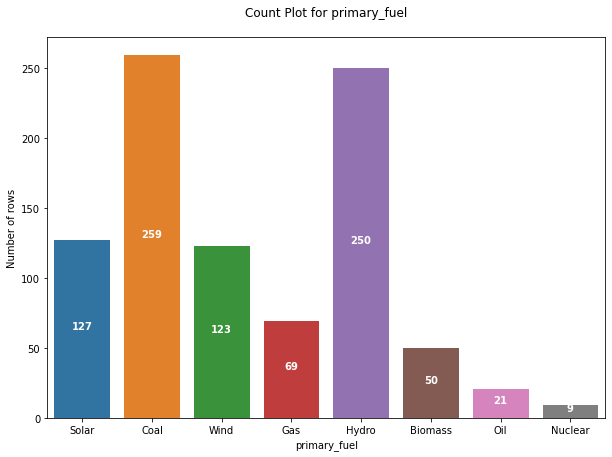

In [27]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = data[col_name].value_counts()
    index = 0
    ax = sns.countplot(data[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass


In [28]:
#this shows that highest number of values have been covered by coal and hydro fuel types so they are our main power source then comes solar and wind. And gas,biomass,oil and nuclear have very low data counts

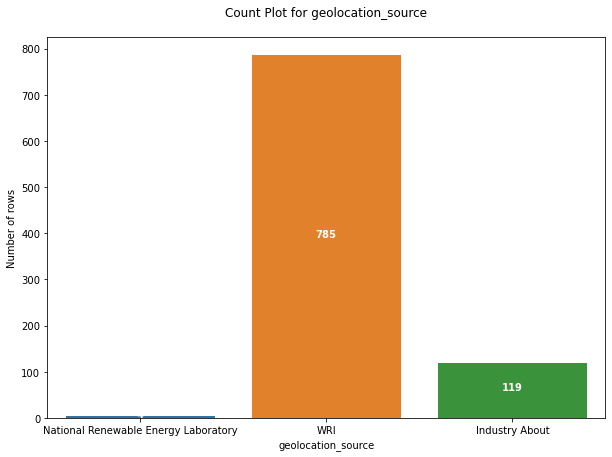

In [29]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = data[col_name].value_counts()
    index = 0
    ax = sns.countplot(data[col_name])

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In [30]:
#we see that the highest data value is covered by WRI option and the least value has been accumulated by National Renewable Energy Laboratory.

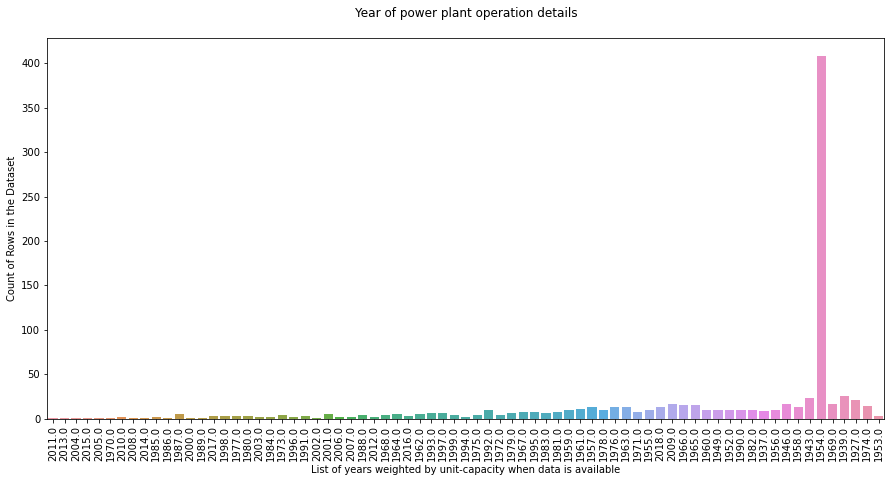

In [31]:
plt.figure(figsize=(15,7))
values = list(data['commissioning_year'].unique())
diag = sns.countplot(data["commissioning_year"])
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In [32]:
#we can see the list of years as to when the power plant data was made available.In the year 1954 covered the most rows in our dataset compared to all the other years

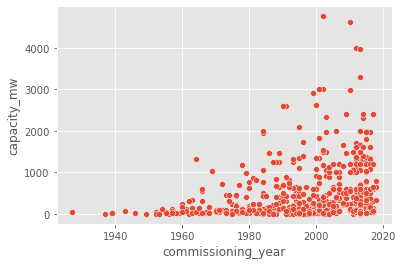

In [33]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = data)
plt.show()

In [35]:
#This shows that the electricity generating capacity measured in mega watts has increased a lot in the recent years when compared to the past due to the invention of efficient fuel types used for power generation.

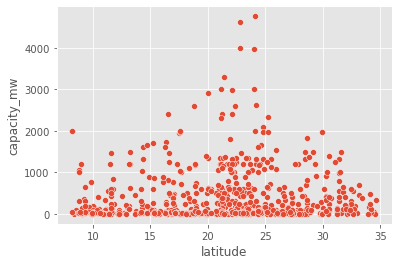

In [36]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = data)
plt.show()

In [37]:
#the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

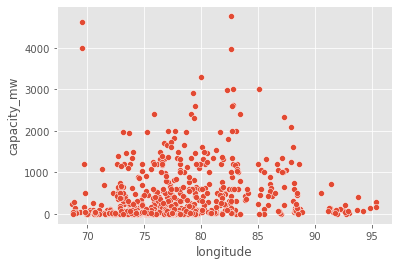

In [38]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = data)
plt.show()

In [39]:
#the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

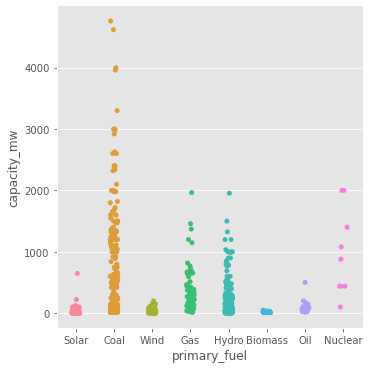

In [40]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.show()

In [41]:
#the capacity of power generated by coal in megawatts is the highest and by biomass is the lowest.

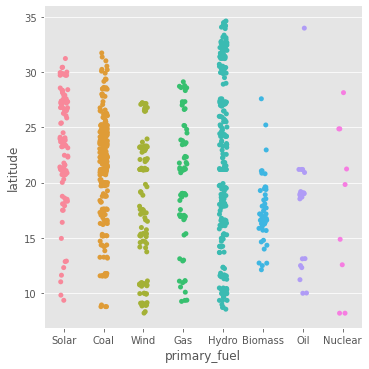

In [42]:
sns.catplot(x = "primary_fuel", y = "latitude", data = data)
plt.show()

In [43]:
#hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

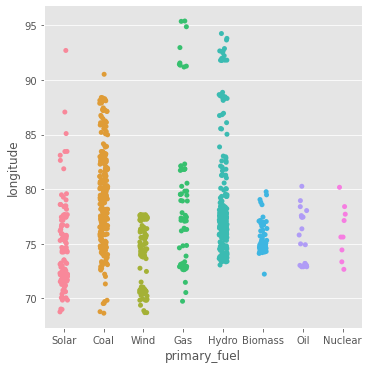

In [44]:
sns.catplot(x = "primary_fuel", y = "longitude", data = data)
plt.show()

In [46]:
#Longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type and these are the main source of power as the availabilty of these resources is quite high across the globe but on the other we have fuel types solar and wind that are quite comprising when targeted across the longitude values.

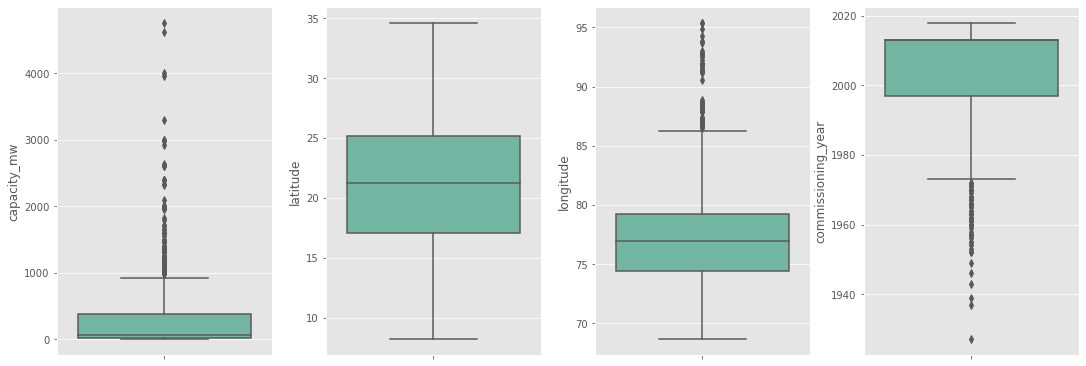

In [47]:
#to check for any outliers present
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in data[float_dt].items():
    sns.boxplot(y=col, data=data, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In [48]:
#outliers are present in our numerical columns so it needs to be taken care of before moving onto model building.

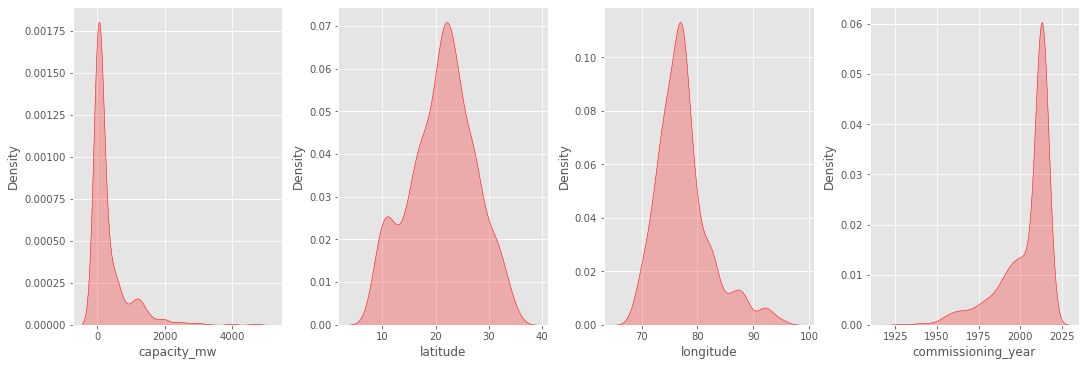

In [50]:
#checking for skewness
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in data[float_dt].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In [51]:
#skewness can be seen and it needs to be fixed before moving onto the model building process.

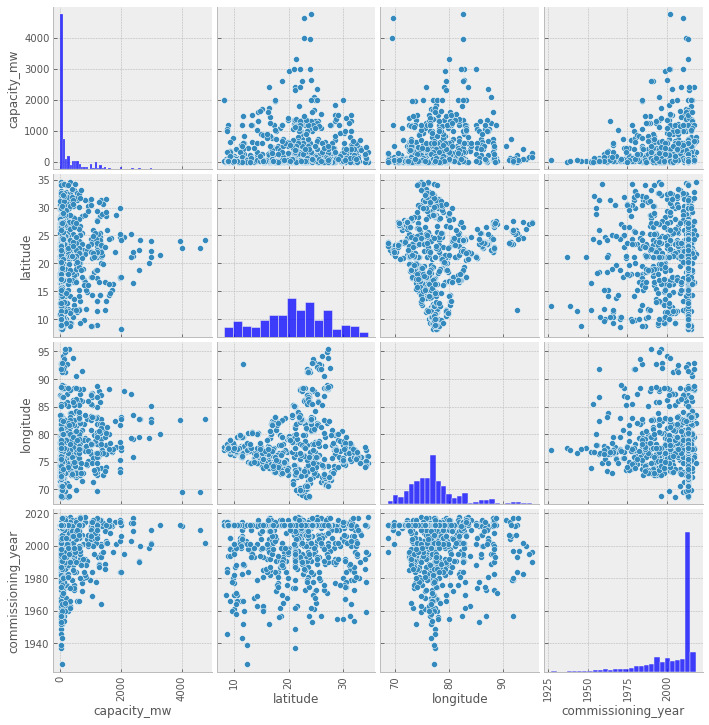

In [52]:
plt.style.use('bmh')
g = sns.pairplot(data)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

# Encoding

In [53]:
#Label encoder
le = LabelEncoder()
data["primary_fuel"] = le.fit_transform(data["primary_fuel"])
data.head()
#to convert our labels from the obj datatype to numerical datatype.

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [54]:
# Ordinal encoder

oe = OrdinalEncoder()
data['geolocation_source'] = oe.fit_transform(data['geolocation_source'].values.reshape(-1,1))
data['source'] = oe.fit_transform(data['source'].values.reshape(-1,1))
data.head()
#using ordinal encoder to convert all the categorical feature columns from obj datatype to numerical datatype

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


# Correlation

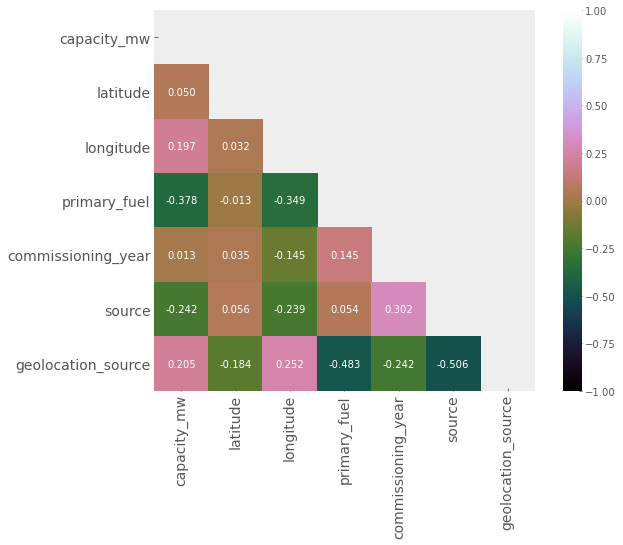

In [55]:
upper_triangle = np.triu(data.corr())
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [56]:
#Our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns

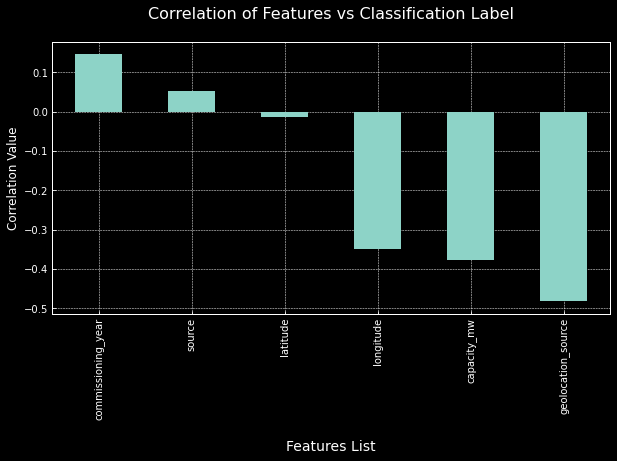

In [59]:
#Correlation bar plot comparing features with our labels
plt.style.use('dark_background')
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

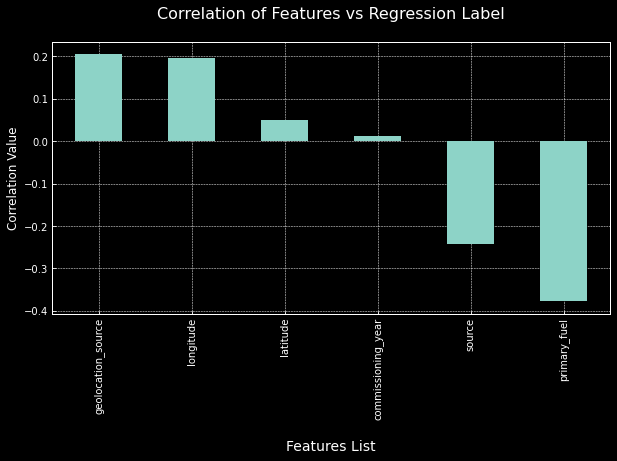

In [61]:
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Using Z score to remove outliers

In [62]:
z = np.abs(zscore(data))
threshold = 3
data1 = data[(z<3).all(axis = 1)]

print ("Shape before removing outliers: ", data.shape)
print ("Shape after removing outliers: ", data1.shape)
print ("Percentage of data loss: ", (data.shape[0]-data1.shape[0])/data.shape[0]*100)

data=data1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape before removing outliers:  (908, 7)
Shape after removing outliers:  (839, 7)
Percentage of data loss:  7.599118942731277


In [64]:
data.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

In [65]:
#Using Log Transform to fix skewness
for col in float_dt:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

# Splitting,Sampling and Scaling

In [66]:
X = data.drop('primary_fuel', axis=1)
Y = data['primary_fuel']

In [67]:
Y.value_counts()
#for listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

In [68]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [69]:
Y.value_counts()

0    237
1    237
2    237
3    237
4    237
5    237
6    237
7    237
Name: primary_fuel, dtype: int64

feature scaling

In [71]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()
#scaling my feature data to ensure that there is no issue with the data biasness over a particular column 

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.736624,1.425711,-0.869700,0.510641,1.386238,-1.177260
1,0.172666,0.836101,-0.467730,0.681898,2.845567,0.371534
2,-0.342166,0.342258,-2.047252,0.681898,-0.589468,0.371534
3,0.354055,0.681677,3.936991,-0.088759,-0.567016,0.371534
4,1.829822,0.352005,1.693288,0.853155,-0.567016,0.371534


In [72]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 73.20675105485233 on Random State 432


# Model building and classification

In [73]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=432)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score:", result)

In [74]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78        64
           1       0.70      0.48      0.57        65
           2       0.58      0.36      0.44        39
           3       0.54      0.53      0.54        47
           4       0.68      0.97      0.80        61
           5       0.65      0.46      0.54        56
           6       1.00      0.97      0.99        72
           7       0.75      1.00      0.86        70

    accuracy                           0.73       474
   macro avg       0.71      0.70      0.69       474
weighted avg       0.73      0.73      0.72       474

Accuracy Score: 73.20675105485233
Cross Validation Score: 67.35245104846548

Accuracy Score - Cross Validation Score: 5.85430000638685


In [83]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        64
           1       0.82      0.62      0.70        65
           2       0.77      0.62      0.69        39
           3       0.88      0.62      0.73        47
           4       0.76      1.00      0.87        61
           5       0.84      0.88      0.86        56
           6       1.00      0.97      0.99        72
           7       0.77      1.00      0.87        70

    accuracy                           0.84       474
   macro avg       0.84      0.82      0.82       474
weighted avg       0.84      0.84      0.83       474

Accuracy Score: 83.75527426160338
Cross Validation Score: 80.43257880849882

Accuracy Score - Cross Validation Score: 3.322695453104558


In [84]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.71      0.78      0.74        65
           2       0.67      0.74      0.71        39
           3       0.77      0.70      0.73        47
           4       0.91      0.87      0.89        61
           5       0.88      0.91      0.89        56
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        70

    accuracy                           0.88       474
   macro avg       0.87      0.86      0.86       474
weighted avg       0.88      0.88      0.88       474

Accuracy Score: 87.76371308016878
Cross Validation Score: 84.12498264129982

Accuracy Score - Cross Validation Score: 3.6387304388689614


In [85]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.93      0.80      0.86        65
           2       0.78      0.82      0.80        39
           3       0.90      0.79      0.84        47
           4       0.87      0.98      0.92        61
           5       0.93      0.96      0.95        56
           6       1.00      1.00      1.00        72
           7       0.99      1.00      0.99        70

    accuracy                           0.93       474
   macro avg       0.92      0.92      0.92       474
weighted avg       0.93      0.93      0.93       474

Accuracy Score: 92.82700421940928
Cross Validation Score: 89.55756144979864

Accuracy Score - Cross Validation Score: 3.2694427696106345


In [79]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        64
           1       0.92      0.69      0.79        65
           2       0.79      0.85      0.81        39
           3       0.88      0.79      0.83        47
           4       0.88      0.98      0.93        61
           5       0.93      0.95      0.94        56
           6       1.00      1.00      1.00        72
           7       0.92      1.00      0.96        70

    accuracy                           0.91       474
   macro avg       0.91      0.91      0.90       474
weighted avg       0.91      0.91      0.91       474

Accuracy Score: 91.35021097046413
Cross Validation Score: 91.24441049854187

Accuracy Score - Cross Validation Score: 0.10580047192226516


hyper paramter tuning

In [86]:
fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [87]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [88]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [89]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 4,
 'n_jobs': 2,
 'random_state': 111}

In [90]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=20, min_samples_split=4, n_jobs=2, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 90.71729957805907


successfully incorporated the Hyper Parameter Tuning on my Final Classification Model and received the accuracy score for it.

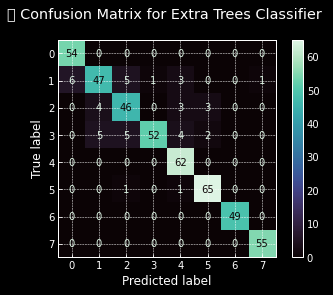

In [91]:
#Confusion matrix
class_names = data.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

In [92]:
filename = "FinalModel_Classification_globalPP.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Classification_globalPP.pkl']

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [94]:
X = data.drop('capacity_mw', axis=1)
Y = data['capacity_mw']

In [95]:
#Feature Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Finding the best random state for building Regression Models

In [96]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5383340720045708 on Random State 135


In [98]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score:", result)

In [99]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score: 1.2755006251261407
R2 Score: 53.83340720045708
Cross Validation Score: 42.23177089747712
R2 Score - Cross Validation Score: 11.601636302979962


In [100]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score: 1.2754999383789567
R2 Score: 53.83345691390833
Cross Validation Score: 42.258044119383484
R2 Score - Cross Validation Score: 11.575412794524844


In [101]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score: 1.4028822860149066
R2 Score: 44.15183151646706
Cross Validation Score: 37.52199723471622
R2 Score - Cross Validation Score: 6.6298342817508455


In [102]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score: 1.1644556142667237
R2 Score: 61.52201239071928
Cross Validation Score: 47.635622859038264
R2 Score - Cross Validation Score: 13.886389531681019


In [103]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score: 1.2334007972041963
R2 Score: 56.83070842167314
Cross Validation Score: 45.38511042293831
R2 Score - Cross Validation Score: 11.445597998734826


In [109]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score: 1.0236598383301694
R2 Score: 70.26432497858255
Cross Validation Score: 63.37603213280628
R2 Score - Cross Validation Score: 6.88829284577627


In [104]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score: 1.5982852424124423
R2 Score: 27.510508854459104
Cross Validation Score: 1.804956752558191
R2 Score - Cross Validation Score: 25.705552101900913


In [105]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score: 1.1131522779037217
R2 Score: 64.83783310530653
Cross Validation Score: 55.637601015967334
R2 Score - Cross Validation Score: 9.200232089339195


In [106]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score: 1.007419897819593
R2 Score: 71.20032935535696
Cross Validation Score: 58.83430991273036
R2 Score - Cross Validation Score: 12.366019442626595


Hyper parameter tuning 

In [110]:
# Choosing Extra Trees Regressor

fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [111]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [112]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [113]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

In [114]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.67988346483102


In [115]:
filename = "FinalModel_Regression_Globalpp.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_Globalpp.pkl']